In [156]:
import numpy as np
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
%matplotlib inline

In [104]:
df_train = pd.read_csv("train.csv")
test_data=pd.read_csv('test.csv')

In [105]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [106]:
df_train.isnull().values.any()

False

In [107]:
#check the labels
df_train["Activity"].unique()


array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

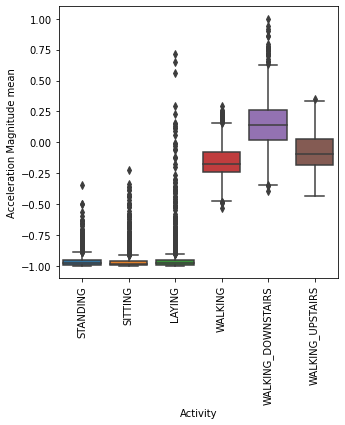

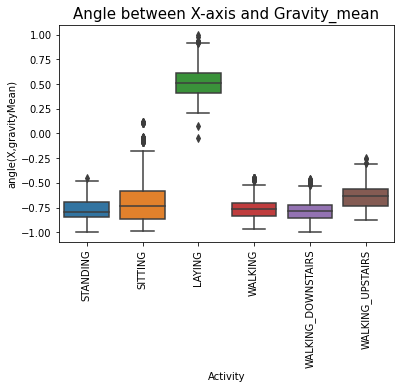

In [108]:
#data exploration
plt.figure(figsize=(5,5))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=df_train)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=df_train)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

In [109]:
# Number of STANDING data
print(f"Number of STANDING rows: {len(df_train[df_train['Activity']=='STANDING'])}")
print(f"Number of SITTING rows: {len(df_train[df_train['Activity']=='SITTING'])}")
print(f"Number of LAYING rows: {len(df_train[df_train['Activity']=='LAYING'])}")
print(f"Number of WALKING rows: {len(df_train[df_train['Activity']=='WALKING'])}")
print(f"Number of WALKING_DOWNSTAIRS rows: {len(df_train[df_train['Activity']=='WALKING_DOWNSTAIRS'])}")
print(f"Number of WALKING_UPSTAIRS rows: {len(df_train[df_train['Activity']=='WALKING_UPSTAIRS'])}")


Number of STANDING rows: 1374
Number of SITTING rows: 1286
Number of LAYING rows: 1407
Number of WALKING rows: 1226
Number of WALKING_DOWNSTAIRS rows: 986
Number of WALKING_UPSTAIRS rows: 1073


In [110]:
# drop useless col
df_train = df_train.drop(['subject'], axis=1)

In [111]:
X = df_train.drop(['Activity'], axis=1)
Y = df_train['Activity']
X_test = test_data.drop(['Activity', 'subject'], axis=1)
Y_test = test_data['Activity']

In [112]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [113]:
Y.tail()

7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, dtype: object

In [114]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, stratify=Y, test_size = 0.2, )


In [115]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, X_valid.shape, Y_valid.shape

((5881, 561), (2947, 561), (5881,), (2947,), (1471, 561), (1471,))

In [116]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_valid=sc.transform(X_valid)


In [117]:
#one hot encode
encoder=LabelEncoder()
Y_train=encoder.fit_transform(Y_train)
Y_train=pd.get_dummies(Y_train).values

encoder=LabelEncoder()
Y_test=encoder.fit_transform(Y_test)
Y_test=pd.get_dummies(Y_test).values

encoder=LabelEncoder()
Y_valid=encoder.fit_transform(Y_valid)
Y_valid=pd.get_dummies(Y_valid).values



In [118]:
Y_train

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

In [119]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, X_valid.shape, Y_valid.shape

((5881, 561), (2947, 561), (5881, 6), (2947, 6), (1471, 561), (1471, 6))

In [39]:
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
pred

array([1, 2, 2, ..., 1, 1, 2])

In [157]:
from sklearn.neighbors import KNeighborsClassifier
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = RandomizedSearchCV(knn_2, hyperparameters, cv=10, verbose=2)
#Fit the model
best_model = clf.fit(X_train,Y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ p=2, n_neighbors=21, leaf_size=40, total=   2.2s
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ................ p=2, n_neighbors=21, leaf_size=40, total=   2.2s
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................
[CV] ................ p=2, n_neighbors=21, leaf_size=40, total=   2.2s
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................
[CV] ................ p=2, n_neighbors=21, leaf_size=40, total=   2.1s
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................
[CV] ................ p=2, n_neighbors=21, leaf_size=40, total=   2.2s
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................
[CV] ................ p=2, n_neighbors=21, leaf_size=40, total=   2.2s
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................
[CV] ................ p=2, n_neighbors=21, leaf_size=40, total=   2.2s
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................
[CV] ................ p=2, n_neighbors=21, leaf_size=40, total=   2.3s
[CV] p=2, n_neighbors=21, leaf_size=40 ...............................
[CV] .

[CV] ................ p=1, n_neighbors=29, leaf_size=13, total=   3.8s
[CV] p=2, n_neighbors=9, leaf_size=30 ................................
[CV] ................. p=2, n_neighbors=9, leaf_size=30, total=   2.1s
[CV] p=2, n_neighbors=9, leaf_size=30 ................................
[CV] ................. p=2, n_neighbors=9, leaf_size=30, total=   2.1s
[CV] p=2, n_neighbors=9, leaf_size=30 ................................
[CV] ................. p=2, n_neighbors=9, leaf_size=30, total=   2.1s
[CV] p=2, n_neighbors=9, leaf_size=30 ................................
[CV] ................. p=2, n_neighbors=9, leaf_size=30, total=   2.2s
[CV] p=2, n_neighbors=9, leaf_size=30 ................................
[CV] ................. p=2, n_neighbors=9, leaf_size=30, total=   2.2s
[CV] p=2, n_neighbors=9, leaf_size=30 ................................
[CV] ................. p=2, n_neighbors=9, leaf_size=30, total=   2.3s
[CV] p=2, n_neighbors=9, leaf_size=30 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.3min finished


Best leaf_size: 3
Best p: 2
Best n_neighbors: 9


In [1]:
Y_test_noencode = Y_test.argsort()[:,-1]
predic


NameError: name 'Y_test' is not defined

In [164]:
predic = best_model.predict(X_test)
predic_no_encode = predic.argsort()[:,-1]
y_test_string  = list(encoder.inverse_transform(Y_test_noencode))
y_pred_string = list(encoder.inverse_transform(predic_no_encode))
print(classification_report(y_test_string,y_pred_string))

                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.97       537
           SITTING       0.90      0.77      0.83       491
          STANDING       0.81      0.94      0.87       532
           WALKING       0.85      0.98      0.91       496
WALKING_DOWNSTAIRS       0.97      0.72      0.83       420
  WALKING_UPSTAIRS       0.83      0.91      0.87       471

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947



Text(32.09374999999999, 0.5, 'True Label')

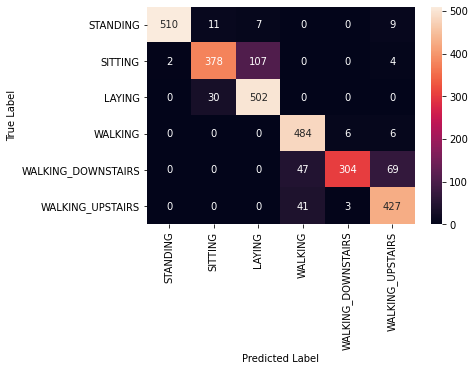

In [165]:
cf_matrix = confusion_matrix(y_test_string, y_pred_string)
p = sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], fmt='g')
p.set_xlabel("Predicted Label", fontsize = 10)
p.set_ylabel("True Label", fontsize = 10)

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='macro')

0.9833134675128608

In [44]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total=   2.0s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=   1.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   1.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   1.8s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   1.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  30.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  30.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  30.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  28.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.9s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   2.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.9s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.8s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   3.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   2.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   2.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   2.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   2.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.9s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.8s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.8s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 24.4min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [45]:
grid.best_params_


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [50]:
predic = grid.predict(X_test)
y_test_string  = list(encoder.inverse_transform(y_test))
y_pred_string = list(encoder.inverse_transform(predic))
print(classification_report(y_test_string,y_pred_string))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.98      0.96      0.97       257
          STANDING       0.97      0.98      0.98       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       0.99      1.00      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



Text(32.09374999999999, 0.5, 'True Label')

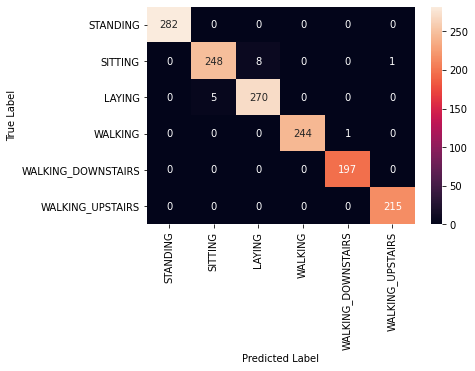

In [58]:
cf_matrix = confusion_matrix(y_test_string, y_pred_string)
p = sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], fmt='g')
p.set_xlabel("Predicted Label", fontsize = 10)
p.set_ylabel("True Label", fontsize = 10)

In [48]:
f1_score(y_test, predic, average='macro')

0.9903573435360226

In [120]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
X_valid=pca.transform(X_valid)
explained_variance=pca.explained_variance_ratio_

In [178]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras_tuner as kt
from tensorflow import keras
import hyperopt as hp

def model_builder(hp):
    model=Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32),
                    kernel_initializer='uniform',activation='relu'))

    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=512, step=32),
                    kernel_initializer='uniform',activation='relu'))

    model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [179]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,overwrite=True)
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, Y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}, The optimal number of units in the second densely-connected
layer is {best_hps.get('units1')}, The optimal number of units in the third densely-connected
layer is {best_hps.get('units2')} the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 04s]
val_accuracy: 0.9881053566932678

Best val_accuracy So Far: 0.9923534393310547
Total elapsed time: 00h 01m 16s
INFO:tensorflow:Oracle triggered exit
{'units': 64, 'units1': 32, 'units2': 512, 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64, The optimal number of units in the second densely-connected
layer is 32, The optimal number of units in the third densely-connected
layer is 512 the optimal learning rate for the optimizer
is 0.001.



In [183]:
print(f"""
The hyperparameter search is complete.\nThe optimal number of units in the first densely-connected
layer is {best_hps.get('units')}\nThe optimal number of units in the second densely-connected
layer is {best_hps.get('units1')}\nThe optimal number of units in the third densely-connected
layer is {best_hps.get('units2')}\nThe optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete.
The optimal number of units in the first densely-connected
layer is 64
The optimal number of units in the second densely-connected
layer is 32
The optimal number of units in the third densely-connected
layer is 512
The optimal learning rate for the optimizer
is 0.001.



In [142]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_valid,Y_valid))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
# history=model.fit(X_train,Y_train,batch_size=256,epochs=22,validation_data=(X_valid,Y_valid))

Epoch 1/50
184/184 [==============================] - 1s 3ms/step - loss: 0.3752 - accuracy: 0.8446 - val_loss: 0.0752 - val_accuracy: 0.9674
Epoch 2/50
184/184 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9818 - val_loss: 0.0541 - val_accuracy: 0.9789
Epoch 3/50
184/184 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9903 - val_loss: 0.0348 - val_accuracy: 0.9850
Epoch 4/50
184/184 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9935 - val_loss: 0.0426 - val_accuracy: 0.9823
Epoch 5/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0445 - val_accuracy: 0.9837
Epoch 6/50
184/184 [==============================] - 1s 3ms/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.0401 - val_accuracy: 0.9864
Epoch 7/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0477 - val_accuracy: 0.9837
Epoch 

In [143]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, Y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/14
147/147 [==============================] - 1s 3ms/step - loss: 0.4408 - accuracy: 0.8333 - val_loss: 0.0613 - val_accuracy: 0.9830
Epoch 2/14
147/147 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0614 - val_accuracy: 0.9830
Epoch 3/14
147/147 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9894 - val_loss: 0.0438 - val_accuracy: 0.9830
Epoch 4/14
147/147 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0441 - val_accuracy: 0.9847
Epoch 5/14
147/147 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0454 - val_accuracy: 0.9881
Epoch 6/14
147/147 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9974 - val_loss: 0.0460 - val_accuracy: 0.9864
Epoch 7/14
147/147 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9979 - val_loss: 0.0481 - val_accuracy: 0.9890
Epoch 

In [145]:
eval_result = hypermodel.evaluate(X_test, Y_test)
print("[test loss, test accuracy]:", eval_result)

93/93 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.9562
[test loss, test accuracy]: [0.2512839138507843, 0.956226646900177]


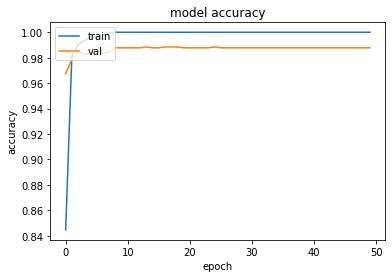

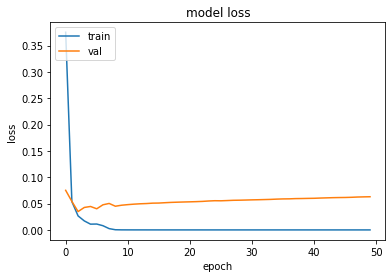

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [148]:
y_pred=hypermodel.predict(X_test)
y_test_class=np.argmax(Y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

Text(32.09374999999999, 0.5, 'True Label')

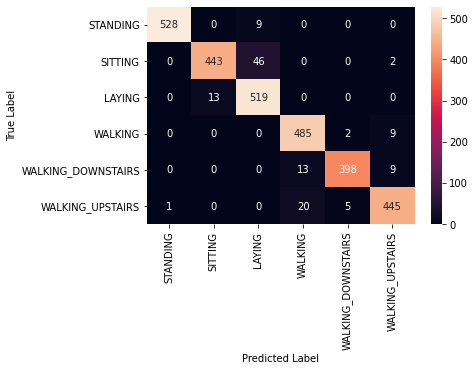

In [150]:
cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class,y_pred_class)
p = sns.heatmap(cm, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], fmt='g')
p.set_xlabel("Predicted Label", fontsize = 10)
p.set_ylabel("True Label", fontsize = 10)

In [151]:
accuracy

0.9562266711910418

In [152]:
y_test_string  = list(encoder.inverse_transform(y_test_class))
y_pred_string = list(encoder.inverse_transform(y_pred_class))
print(classification_report(y_test_string,y_pred_string))

                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.97      0.90      0.94       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.98      0.95      0.96       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
                    precision    recall  f1-score   support

            LAYING       0.99      0.90      0.94       496
           SITTING       0.89      0.94      0.91       471
          STANDING       0.88      0.99      0.93       420
           WALKING       0.81      0.79      0.80       491
WALKING_DOWNSTAIRS       0.82      0.83      0.83       532
  WALKING_UPSTAIRS       1.00      0.95      0.97       537

          accuracy                           0.90      2947
         macro avg       0.90      0.90      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



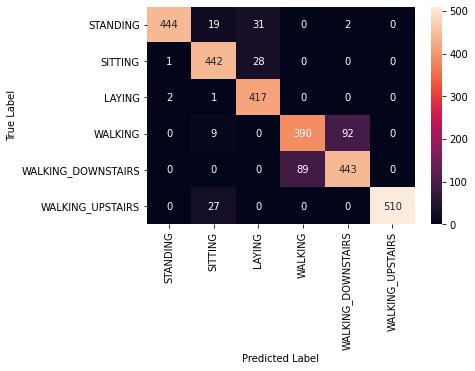

>p=False #1: 89.786
                    precision    recall  f1-score   support

            LAYING       0.97      0.93      0.95       496
           SITTING       0.98      0.90      0.94       471
          STANDING       0.85      0.97      0.91       420
           WALKING       0.82      0.78      0.80       491
WALKING_DOWNSTAIRS       0.82      0.84      0.83       532
  WALKING_UPSTAIRS       0.99      1.00      0.99       537

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947



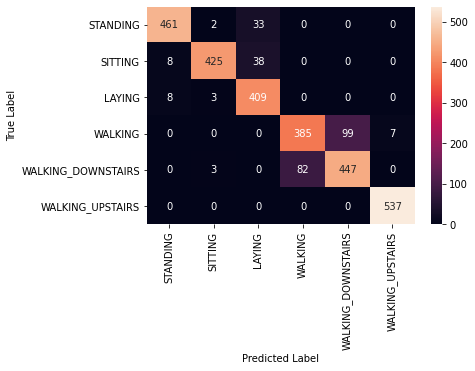

>p=False #2: 90.397
                    precision    recall  f1-score   support

            LAYING       0.98      0.93      0.96       496
           SITTING       0.84      0.96      0.90       471
          STANDING       0.89      0.94      0.92       420
           WALKING       0.88      0.80      0.84       491
WALKING_DOWNSTAIRS       0.87      0.89      0.88       532
  WALKING_UPSTAIRS       1.00      0.95      0.97       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



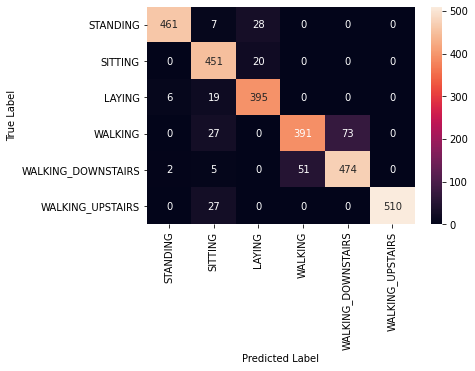

>p=False #3: 91.008
                    precision    recall  f1-score   support

            LAYING       0.84      0.98      0.91       496
           SITTING       0.88      0.77      0.82       471
          STANDING       0.92      0.97      0.94       420
           WALKING       0.81      0.82      0.81       491
WALKING_DOWNSTAIRS       0.87      0.81      0.84       532
  WALKING_UPSTAIRS       0.99      0.95      0.97       537

          accuracy                           0.88      2947
         macro avg       0.88      0.88      0.88      2947
      weighted avg       0.88      0.88      0.88      2947



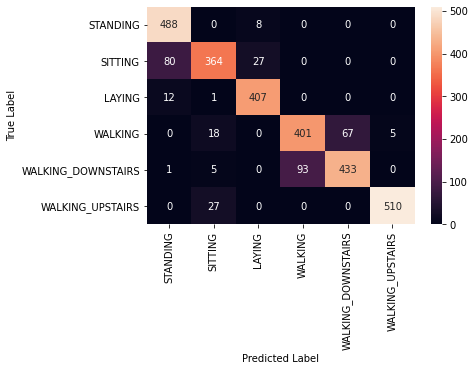

>p=False #4: 88.327
                    precision    recall  f1-score   support

            LAYING       0.85      1.00      0.91       496
           SITTING       0.88      0.88      0.88       471
          STANDING       0.94      0.85      0.89       420
           WALKING       0.85      0.78      0.81       491
WALKING_DOWNSTAIRS       0.85      0.86      0.85       532
  WALKING_UPSTAIRS       0.99      0.97      0.98       537

          accuracy                           0.89      2947
         macro avg       0.89      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947



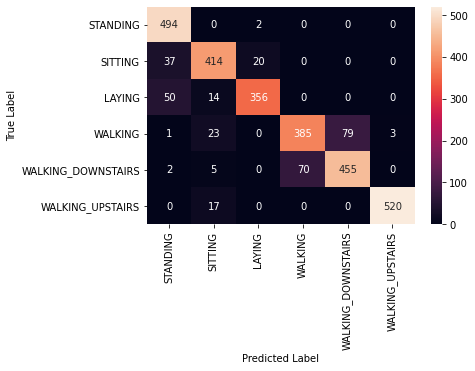

>p=False #5: 89.040
                    precision    recall  f1-score   support

            LAYING       0.99      0.95      0.97       496
           SITTING       0.84      0.95      0.90       471
          STANDING       0.94      0.93      0.94       420
           WALKING       0.87      0.80      0.83       491
WALKING_DOWNSTAIRS       0.84      0.89      0.86       532
  WALKING_UPSTAIRS       1.00      0.95      0.97       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



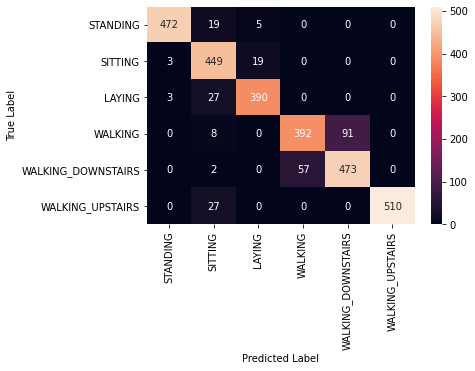

>p=False #6: 91.144
                    precision    recall  f1-score   support

            LAYING       0.99      0.93      0.96       496
           SITTING       0.90      0.95      0.92       471
          STANDING       0.88      0.99      0.93       420
           WALKING       0.82      0.80      0.81       491
WALKING_DOWNSTAIRS       0.86      0.84      0.85       532
  WALKING_UPSTAIRS       1.00      0.96      0.98       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



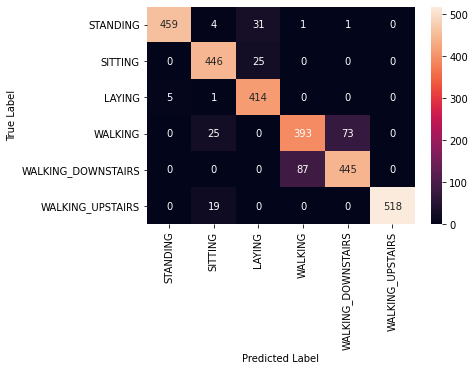

>p=False #7: 90.770
                    precision    recall  f1-score   support

            LAYING       0.98      0.97      0.97       496
           SITTING       0.90      0.93      0.92       471
          STANDING       0.91      0.99      0.95       420
           WALKING       0.81      0.77      0.79       491
WALKING_DOWNSTAIRS       0.84      0.83      0.83       532
  WALKING_UPSTAIRS       1.00      0.96      0.98       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



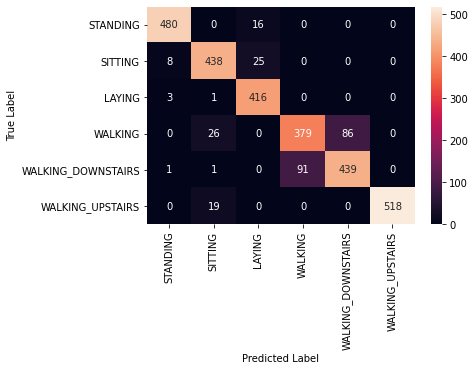

>p=False #8: 90.601
                    precision    recall  f1-score   support

            LAYING       0.95      0.94      0.95       496
           SITTING       0.88      0.89      0.89       471
          STANDING       0.88      1.00      0.94       420
           WALKING       0.79      0.85      0.82       491
WALKING_DOWNSTAIRS       0.90      0.77      0.83       532
  WALKING_UPSTAIRS       0.99      0.95      0.97       537

          accuracy                           0.90      2947
         macro avg       0.90      0.90      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



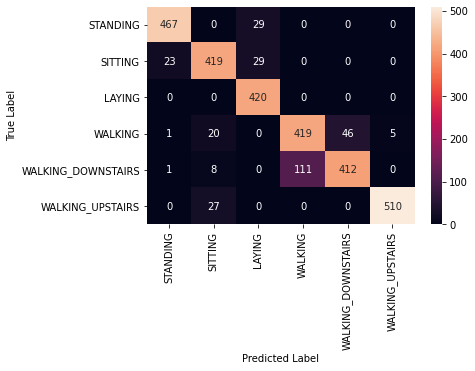

>p=False #9: 89.820
                    precision    recall  f1-score   support

            LAYING       0.98      0.92      0.95       496
           SITTING       0.89      0.92      0.91       471
          STANDING       0.86      0.99      0.92       420
           WALKING       0.87      0.81      0.84       491
WALKING_DOWNSTAIRS       0.87      0.89      0.88       532
  WALKING_UPSTAIRS       0.99      0.95      0.97       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



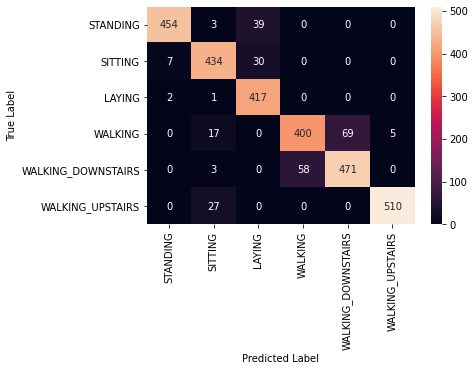

>p=False #10: 91.144
                    precision    recall  f1-score   support

            LAYING       0.99      0.95      0.97       496
           SITTING       0.97      0.93      0.95       471
          STANDING       0.90      1.00      0.95       420
           WALKING       0.81      0.86      0.83       491
WALKING_DOWNSTAIRS       0.88      0.81      0.84       532
  WALKING_UPSTAIRS       0.99      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



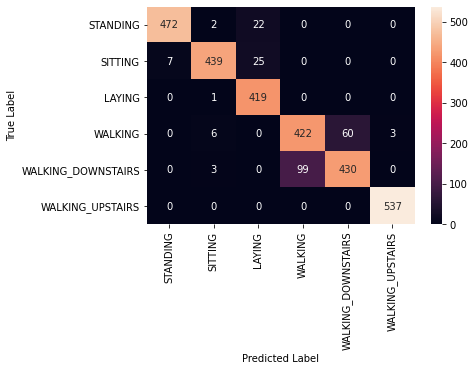

>p=True #1: 92.263
                    precision    recall  f1-score   support

            LAYING       0.98      0.95      0.96       496
           SITTING       0.98      0.94      0.96       471
          STANDING       0.89      0.98      0.93       420
           WALKING       0.77      0.85      0.81       491
WALKING_DOWNSTAIRS       0.86      0.76      0.81       532
  WALKING_UPSTAIRS       0.99      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



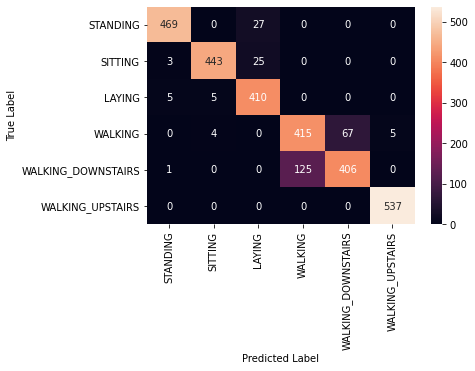

>p=True #2: 90.940
                    precision    recall  f1-score   support

            LAYING       0.98      0.99      0.98       496
           SITTING       0.98      0.91      0.94       471
          STANDING       0.92      0.99      0.96       420
           WALKING       0.81      0.80      0.80       491
WALKING_DOWNSTAIRS       0.84      0.83      0.83       532
  WALKING_UPSTAIRS       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



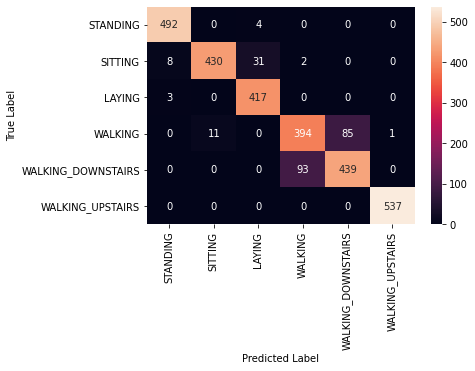

>p=True #3: 91.924
                    precision    recall  f1-score   support

            LAYING       0.99      0.97      0.98       496
           SITTING       0.93      0.94      0.93       471
          STANDING       0.90      0.99      0.94       420
           WALKING       0.85      0.75      0.80       491
WALKING_DOWNSTAIRS       0.83      0.86      0.84       532
  WALKING_UPSTAIRS       0.99      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



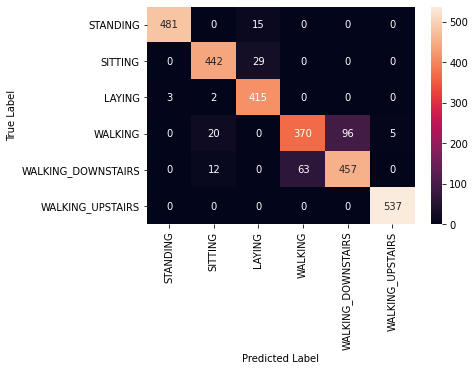

>p=True #4: 91.686
                    precision    recall  f1-score   support

            LAYING       0.95      1.00      0.97       496
           SITTING       0.91      0.90      0.90       471
          STANDING       0.94      0.99      0.96       420
           WALKING       0.81      0.83      0.82       491
WALKING_DOWNSTAIRS       0.88      0.82      0.85       532
  WALKING_UPSTAIRS       1.00      0.96      0.98       537

          accuracy                           0.92      2947
         macro avg       0.91      0.92      0.92      2947
      weighted avg       0.92      0.92      0.91      2947



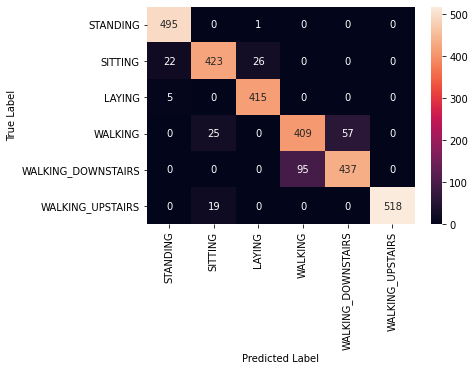

>p=True #5: 91.517
                    precision    recall  f1-score   support

            LAYING       0.94      0.99      0.96       496
           SITTING       0.98      0.91      0.94       471
          STANDING       0.94      0.98      0.96       420
           WALKING       0.75      0.90      0.81       491
WALKING_DOWNSTAIRS       0.91      0.72      0.80       532
  WALKING_UPSTAIRS       1.00      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.92      0.92      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



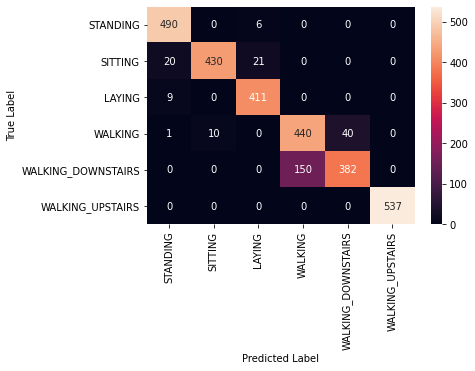

>p=True #6: 91.279
                    precision    recall  f1-score   support

            LAYING       0.99      0.93      0.96       496
           SITTING       0.95      0.93      0.94       471
          STANDING       0.88      0.97      0.92       420
           WALKING       0.76      0.84      0.80       491
WALKING_DOWNSTAIRS       0.86      0.77      0.81       532
  WALKING_UPSTAIRS       1.00      1.00      1.00       537

          accuracy                           0.90      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.90      0.90      2947



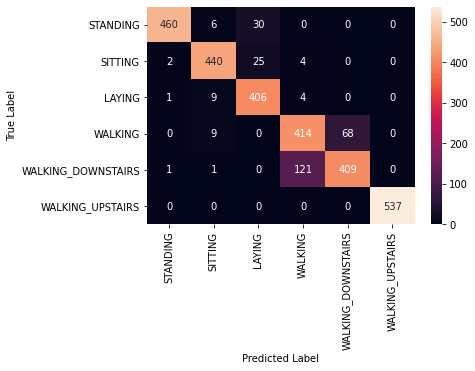

>p=True #7: 90.465
                    precision    recall  f1-score   support

            LAYING       0.89      0.99      0.94       496
           SITTING       0.95      0.90      0.92       471
          STANDING       0.93      0.88      0.90       420
           WALKING       0.85      0.78      0.81       491
WALKING_DOWNSTAIRS       0.83      0.87      0.85       532
  WALKING_UPSTAIRS       0.99      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.91      0.90      2947



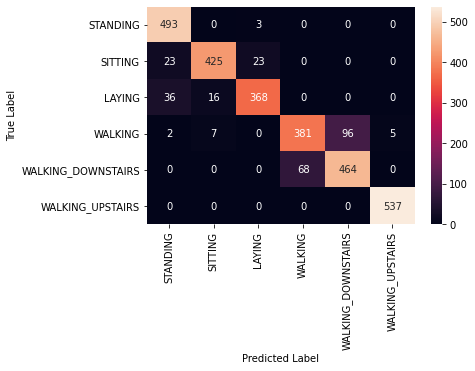

>p=True #8: 90.533
                    precision    recall  f1-score   support

            LAYING       0.94      0.99      0.96       496
           SITTING       0.91      0.94      0.93       471
          STANDING       0.96      0.88      0.92       420
           WALKING       0.81      0.85      0.83       491
WALKING_DOWNSTAIRS       0.87      0.81      0.84       532
  WALKING_UPSTAIRS       0.99      1.00      1.00       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



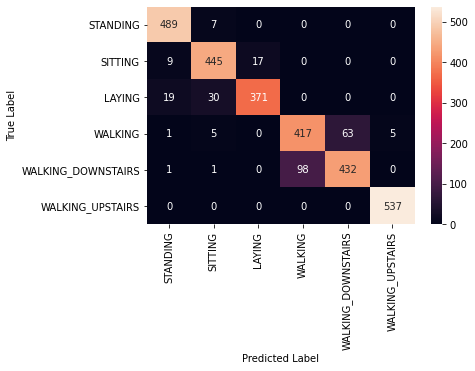

>p=True #9: 91.313
                    precision    recall  f1-score   support

            LAYING       1.00      0.92      0.96       496
           SITTING       0.90      0.96      0.93       471
          STANDING       0.90      0.97      0.94       420
           WALKING       0.73      0.85      0.79       491
WALKING_DOWNSTAIRS       0.89      0.72      0.79       532
  WALKING_UPSTAIRS       1.00      1.00      1.00       537

          accuracy                           0.90      2947
         macro avg       0.90      0.90      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



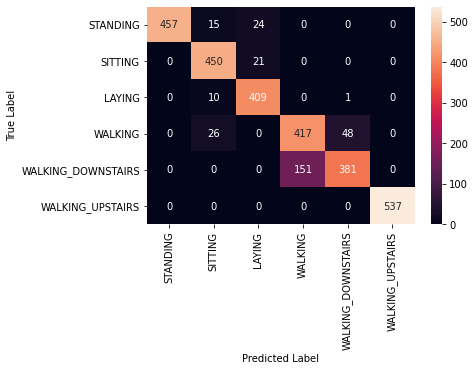

>p=True #10: 89.956
[[89.78622555732727, 90.39701223373413, 91.00780487060547, 88.32710981369019, 89.03970122337341, 91.14353656768799, 90.77027440071106, 90.60060977935791, 89.8201584815979, 91.14353656768799], [92.2633171081543, 90.93993902206421, 91.923987865448, 91.68646335601807, 91.51679873466492, 91.27926826477051, 90.46487808227539, 90.53274393081665, 91.31320118904114, 89.95589017868042]] [False, True]
Param=False: 90.204% (+/-0.901)
Param=True: 91.188% (+/-0.679)


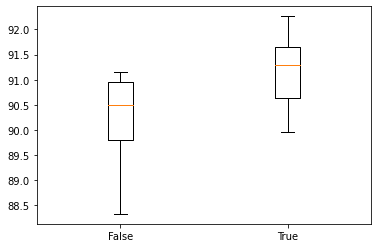

In [216]:
# cnn model with standardization
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy
 
# standardize data
def scale_data(trainX, testX, standardize):
	# remove overlap
	cut = int(trainX.shape[1] / 2)
	longX = trainX[:, -cut:, :]
	# flatten windows
	longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
	# flatten train and test
	flatTrainX = trainX.reshape((trainX.shape[0] * trainX.shape[1], trainX.shape[2]))
	flatTestX = testX.reshape((testX.shape[0] * testX.shape[1], testX.shape[2]))
	# standardize
	if standardize:
		s = StandardScaler()
		# fit on training data
		s.fit(longX)
		# apply to training and test data
		longX = s.transform(longX)
		flatTrainX = s.transform(flatTrainX)
		flatTestX = s.transform(flatTestX)
	# reshape
	flatTrainX = flatTrainX.reshape((trainX.shape))
	flatTestX = flatTestX.reshape((testX.shape))
	return flatTrainX, flatTestX
 
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, param):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	# scale data
	trainX, testX = scale_data(trainX, testX, param)
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	pred = model.predict(testX, verbose=0)
	testy_arg=np.argmax(testy,axis=1)
	pred_arg=np.argmax(pred,axis=1)
	y_test_string  = list(encoder.inverse_transform(testy_arg))
	y_pred_string = list(encoder.inverse_transform(pred_arg))
	print(classification_report(y_test_string,y_pred_string))
	cm=confusion_matrix(testy_arg,pred_arg)
	p = sns.heatmap(cm, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], fmt='g')
	p.set_xlabel("Predicted Label", fontsize = 10)
	p.set_ylabel("True Label", fontsize = 10)
	pyplot.show()
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy
 
# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%s: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_standardize.png')
 
# run an experiment
def run_experiment(params, repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, p)
			score = score * 100.0
			print('>p=%s #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)
 
# run the experiment
n_params = [False, True]
run_experiment(n_params)